# Song Emotion Topic Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [3]:
df_subset = pd.read_csv('./dataset_/subset_dataset.csv') 

In [4]:
df_shuffled = df_subset.sample(frac=1)
df_shuffled.head()

,Unnamed: 0,Country,Uri,Popularity,Title,Artist,Album/Single,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,Popu_max,Top10_dummy,Top50_dummy,Cluster,duration_min
47560,74016,Australia,https://open.spotify.com/track/11GGSyTB8cS9TgO...,531.20,home with you,Madison Beer,album,dance pop,2422150.0,False,As She Pleases,2018-02-02,5,7,0.631,0.599,7,-6.137,0,0.0878,0.0670,0.000000,0.0952,0.7270,170.122,4,pop,1016.0,1.0,1,0,1,0,0,2.0,2.0,3.0,2.0,3.0,1.0,0.0,1.0,7.0,3.0,416.0,Desire,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,125,0.0,0.0,english speaking and nordic,3.176267
14357,22367,Canada,https://open.spotify.com/track/2rRJrJEo19S2J82...,28630.95,falling,Trevor Daniel,album,alternative r&b,504066.0,False,Nicotine,2020-03-26,10,10,0.784,0.430,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.2360,127.087,4,r&b/soul,233.0,1.0,1,0,1,0,0,2.0,3.0,3.0,4.0,3.0,6.0,3.0,2.0,8.0,4.0,291.0,Hope,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16,0.0,1.0,english speaking and nordic,2.656367
70378,168950,Taiwan,https://open.spotify.com/track/6V6ZIG9KBzdi1Qp...,1759.20,waterfall,Eve Ai,single,mandopop,84003.0,False,Waterfall,2017-05-17,1,1,0.453,0.506,9,-9.828,0,0.0467,0.3710,0.000002,0.1020,0.2360,151.921,4,pop,1274.0,1.0,1,0,0,0,1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,173.0,Love,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,0.0,1.0,english speaking and nordic,5.579350
44101,68995,Denmark,https://open.spotify.com/track/2a3dopgTF1q4rMV...,25.60,push my luck,The Chainsmokers,single,dance pop,16931568.0,False,World War Joy...Push My Luck,2019-11-08,1,6,0.584,0.643,2,-6.415,1,0.0395,0.2880,0.000000,0.1860,0.5300,90.036,4,pop,372.0,1.0,1,0,0,0,1,2.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,4.0,2.0,316.0,Hope,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,169,0.0,0.0,english speaking and nordic,3.030733
19099,29759,Switzerland,https://open.spotify.com/track/6BJbOXDlgVAXSaq...,853.85,nc-17,Travis Scott,album,rap,13434540.0,True,ASTROWORLD,2018-08-03,10,17,0.804,0.763,2,-5.480,1,0.0519,0.0678,0.000000,0.3680,0.0585,136.052,4,rap,834.0,1.0,0,1,1,0,0,6.0,4.0,3.0,5.0,4.0,3.0,2.0,3.0,7.0,7.0,330.0,Thug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,0.0,1.0,english speaking and nordic,2.614767


In [5]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70485 entries, 0 to 70484
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           70485 non-null  int64  
 1   Country              70485 non-null  object 
 2   Uri                  70485 non-null  object 
 3   Popularity           70485 non-null  float64
 4   Title                70485 non-null  object 
 5   Artist               70485 non-null  object 
 6   Album/Single         70485 non-null  object 
 7   sub_genre            70485 non-null  object 
 8   Artist_followers     70485 non-null  float64
 9   Explicit             70485 non-null  bool   
 10  Album                70485 non-null  object 
 11  Release_date         70485 non-null  object 
 12  Track_number         70485 non-null  int64  
 13  Tracks_in_album      70485 non-null  int64  
 14  danceability         70485 non-null  float64
 15  energy               70485 non-null 

In [6]:
print('Dataset: ', df_subset.shape[0], 'Rows with', df_subset.shape[1], 'Features')

Dataset:  70485 Rows with 59 Features


In [7]:
#Finding missing values on the dataset
df_subset.isnull().sum()

Unnamed: 0             0
Country                0
Uri                    0
Popularity             0
Title                  0
Artist                 0
Album/Single           0
sub_genre              0
Artist_followers       0
Explicit               0
Album                  0
Release_date           0
Track_number           0
Tracks_in_album        0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acoustics              0
instrumentalness       0
liveliness             0
valence                0
tempo                  0
time_signature         0
genre                  0
Days_since_release     0
Released_after_2017    0
Explicit_false         0
Explicit_true          0
album                  0
compilation            0
single                 0
anger                  0
anticipation           0
disgust                0
fear                   0
joy                    0
sadness                0


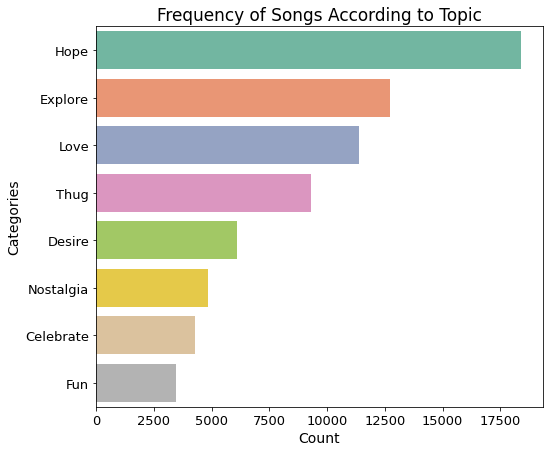

In [8]:
plt.figure(figsize=(8,7))
idx = df_subset['LDA_Topic'].value_counts().index
sns.countplot(y=df_subset['LDA_Topic'], order=idx, palette="Set2")
plt.title('Frequency of Songs According to Topic', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.show()

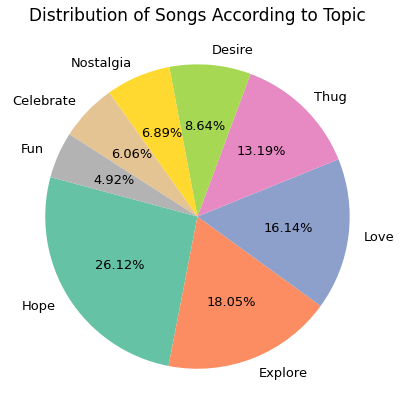

In [9]:
# other palette: ['#0d549e', '#2688de', '#7fdbff','#39cccc','#3d9970','#5ae069','#5ef7a1','#fae457']
plt.figure(figsize=(7,7))
df_subset['LDA_Topic'].value_counts().plot.pie(autopct='%.2f%%', textprops={'fontsize':13}, startangle=165, colors = ['#66c2a5', '#fc8d62', '#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3'])
plt.title('Distribution of Songs According to Topic', fontsize=17)
plt.ylabel('')
plt.show()

In [15]:
feelings = df_shuffled[['anger', 'anticipation', 'disgust',  'fear', 'joy', 'sadness',  'surprise', 'trust']]
feelings.head()

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
47560,2.0,2.0,3.0,2.0,3.0,1.0,0.0,1.0
14357,2.0,3.0,3.0,4.0,3.0,6.0,3.0,2.0
70378,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
44101,2.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0
19099,6.0,4.0,3.0,5.0,4.0,3.0,2.0,3.0


In [11]:
feelings.sum()

anger           197814.0
anticipation    220088.0
disgust         137057.0
fear            209648.0
joy             224601.0
sadness         195147.0
surprise        132424.0
trust           226957.0
dtype: float64

In [14]:
includes_feelings = feelings
for feeling in includes_feelings.columns:
    includes_feelings[feeling] = np.where(includes_feelings[feeling] == 0, 0, 1)
    
includes_feelings.head()

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
47560,1,1,1,1,1,1,0,1
14357,1,1,1,1,1,1,1,1
70378,1,1,0,0,0,0,0,0
44101,1,1,1,1,1,1,1,1
19099,1,1,1,1,1,1,1,1


In [13]:
includes_feelings.sum()

anger           57782
anticipation    63604
disgust         52159
fear            59555
joy             63900
sadness         60524
surprise        55864
trust           63519
dtype: int64

<AxesSubplot:title={'center':'Amount of Songs Including Emotion-related Words'}, ylabel='Emotion'>

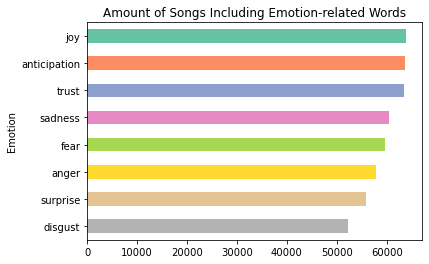

In [13]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
colors = colors[::-1]
includes_feelings.sum().sort_values(ascending=True).plot(kind ='barh', color = colors,title='Amount of Songs Including Emotion-related Words', xlabel="Emotion")

<AxesSubplot:title={'center':'Amount of Emotion-related Words'}, ylabel='Emotion'>

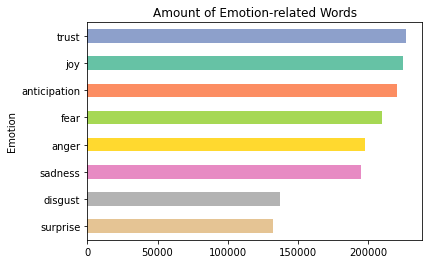

In [17]:
colors =['#8da0cb','#66c2a5','#fc8d62','#a6d854','#ffd92f','#e78ac3','#b3b3b3','#e5c494']
colors = colors[::-1]
feelings.sum().sort_values(ascending=True).plot(kind ='barh', color = colors,title='Amount of Emotion-related Words', xlabel="Emotion")

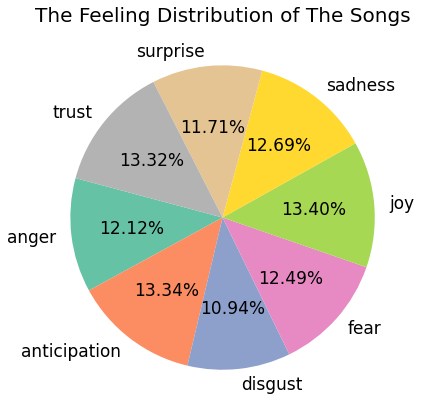

In [14]:
plt.figure(figsize=(7,7))
feelings.sum().plot.pie(autopct='%.2f%%', textprops={'fontsize':17}, startangle=165, colors = ['#66c2a5', '#fc8d62', '#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3'])
plt.title('The Feeling Distribution of The Songs', fontsize=20)
plt.ylabel('')
plt.show()

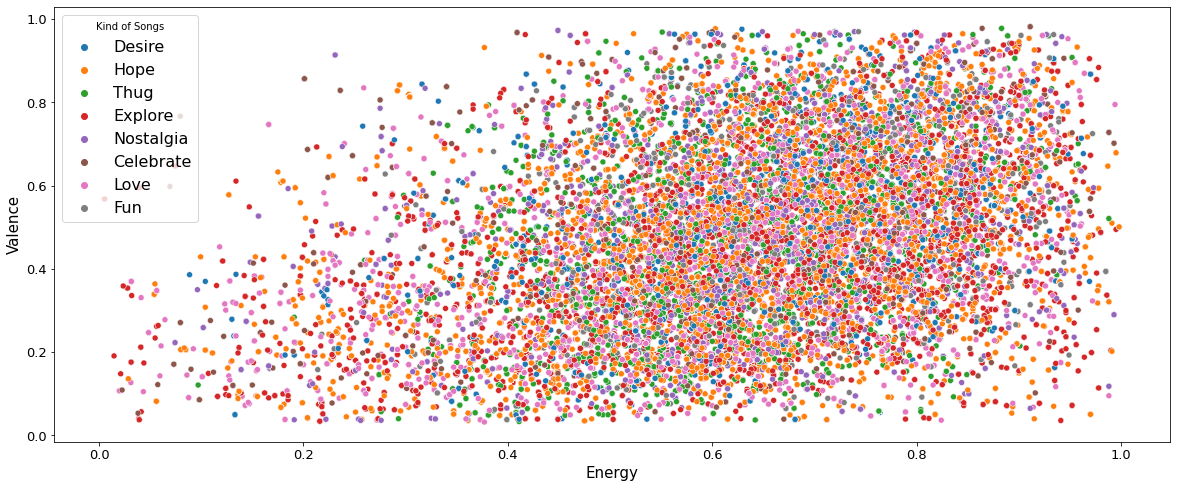

In [15]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df_subset['energy'],y=df_subset['valence'],hue=df_subset['LDA_Topic'])
plt.xlabel('Energy', fontsize=15)
plt.ylabel('Valence', fontsize=15)
plt.legend(prop={'size':16}, title='Kind of Songs')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()